# Install Libraries if missing

# Importing Libraries & Data

In [65]:
#Importing library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [66]:
#Importing Dataset
df = pd.read_csv("flightpassengers.csv")

In [67]:
#Looking into 5 records from dataset
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [68]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Basic EDA & Data Cleaning (if required)

In [69]:
#Total 8 columns in the dataframe
print(df.columns)
#Looking into datatyoes of different columns
print(df.dtypes)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


In [70]:
#No missing records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [71]:
#It can be noticed that "Name" cannot be used as feature as target feature "Survived" will not depend on it
#Survived column is target feature (Given)
#Age,Fare are numerical features
#Pclass,Siblings/Spouses Aboard,Parents/Children Aboard are Discrete features
#Sex is Categorical feature

In [72]:
#To check if there is high data imbalance problem in the given dataset
print(df.Survived.value_counts())
print(df.Survived.value_counts(normalize=True))
#Looking at the % value it is clear that dataset doesn't have high imbalance in terms of target feature

0    545
1    342
Name: Survived, dtype: int64
0    0.614431
1    0.385569
Name: Survived, dtype: float64


In [73]:
#To check different vales and their counts
df["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [74]:
print(df["Sex"].value_counts())
#It is clear that females are survived more than males. So it is important feature. Similar analysis can be done for all features with respect to "Survived" feature
print(df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
#Covert this categorical feature to encoding
mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(mapping)


male      573
female    314
Name: Sex, dtype: int64
      Sex  Survived
0  female  0.742038
1    male  0.190227


In [75]:
#To check different vales and their counts
df["Siblings/Spouses Aboard"].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

In [76]:
#To check different vales and their counts
df["Parents/Children Aboard"].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [77]:
#This primilinary matrix suggests that target feature is highly correlated to Sex,Pclass and Fare in comparison to other features
#Also it can be noticed that no 2 independent feature are highly correlated
df.corr()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,0.542152,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.129507,-0.391492,0.085026,0.020252,-0.548919
Sex,0.542152,-0.129507,1.000000,-0.091875,0.113249,0.244337,0.181137
Age,-0.059665,-0.391492,-0.091875,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,0.113249,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,0.244337,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.181137,0.112329,0.158839,0.215470,1.000000


/Users/a117442680/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/a117442680/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


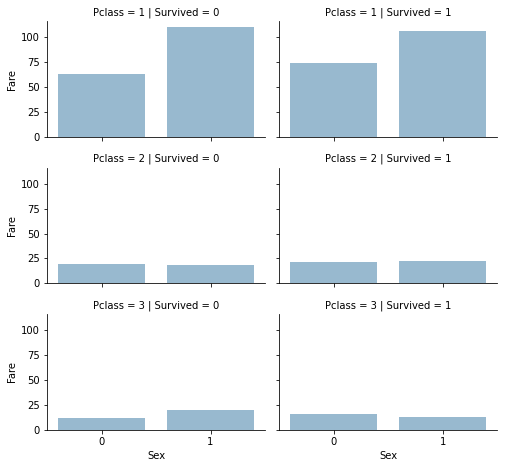

In [78]:
#We can use seaborn for better visualizations
#For now, I am not exploring it much on this dataset but it can be done on other features as well
grid = sns.FacetGrid(df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

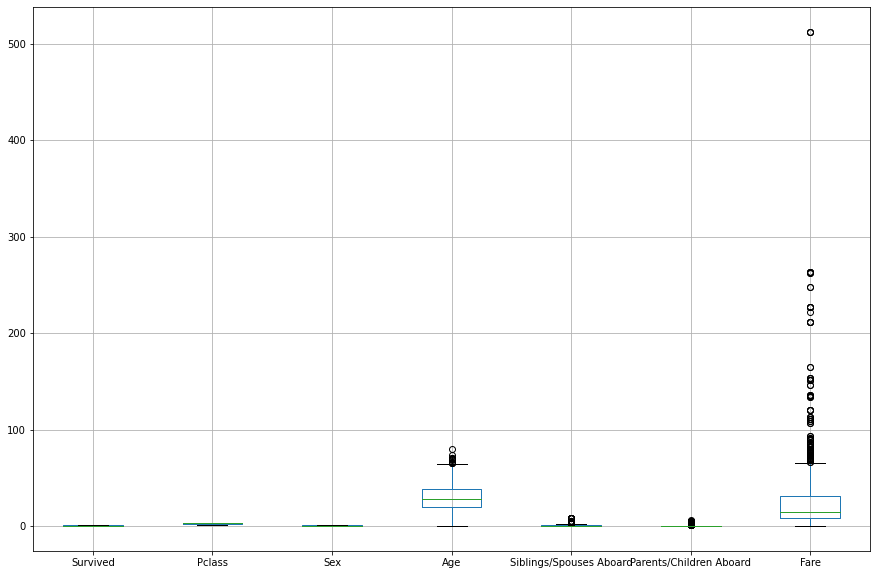

In [80]:
#Checking Outliers: Age and Fare has outliers but for now I am ignoring it
#Ideally this outliers should have been checked for only continuous numerical data but for now I have checked on complete dataset 
#Drop Name from dataset
df_1=df.drop(["Name"],axis=1)
plt.figure(figsize=(15,10))
df_1.boxplot()

# Training multiple model

In [81]:
#lets consider all columns expect Survived as independent features
#Survived is target feature
y=df_1.Survived
#Remaining are independent features
X=df_1.drop(["Survived"],axis=1)

In [82]:
#Splitting dataset into training and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [83]:
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=4,random_state=5)
rf=RandomForestClassifier(max_depth=4,n_estimators=10,max_features=4,random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
pac = PassiveAggressiveClassifier(max_iter=100)

lr.fit(X_train,Y_train)
print("lr=",lr.score(X_test,Y_test))

svm.fit(X_train,Y_train)
print("svc=",svm.score(X_test,Y_test))

dt.fit(X_train,Y_train)
print("dt=",dt.score(X_test,Y_test))

rf.fit(X_train,Y_train)
print("rf=",rf.score(X_test,Y_test))

knn.fit(X_train,Y_train)
print("KNN=" , knn.score(X_test,Y_test))

nb.fit(X_train,Y_train)
print ("nb=", nb.score(X_test,Y_test))

pac.fit(X_train,Y_train)
print ("pac=", pac.score(X_test,Y_test))



lr= 0.8089887640449438
svc= 0.6910112359550562
dt= 0.8314606741573034
rf= 0.8314606741573034
KNN= 0.6460674157303371
nb= 0.7752808988764045
pac= 0.5955056179775281


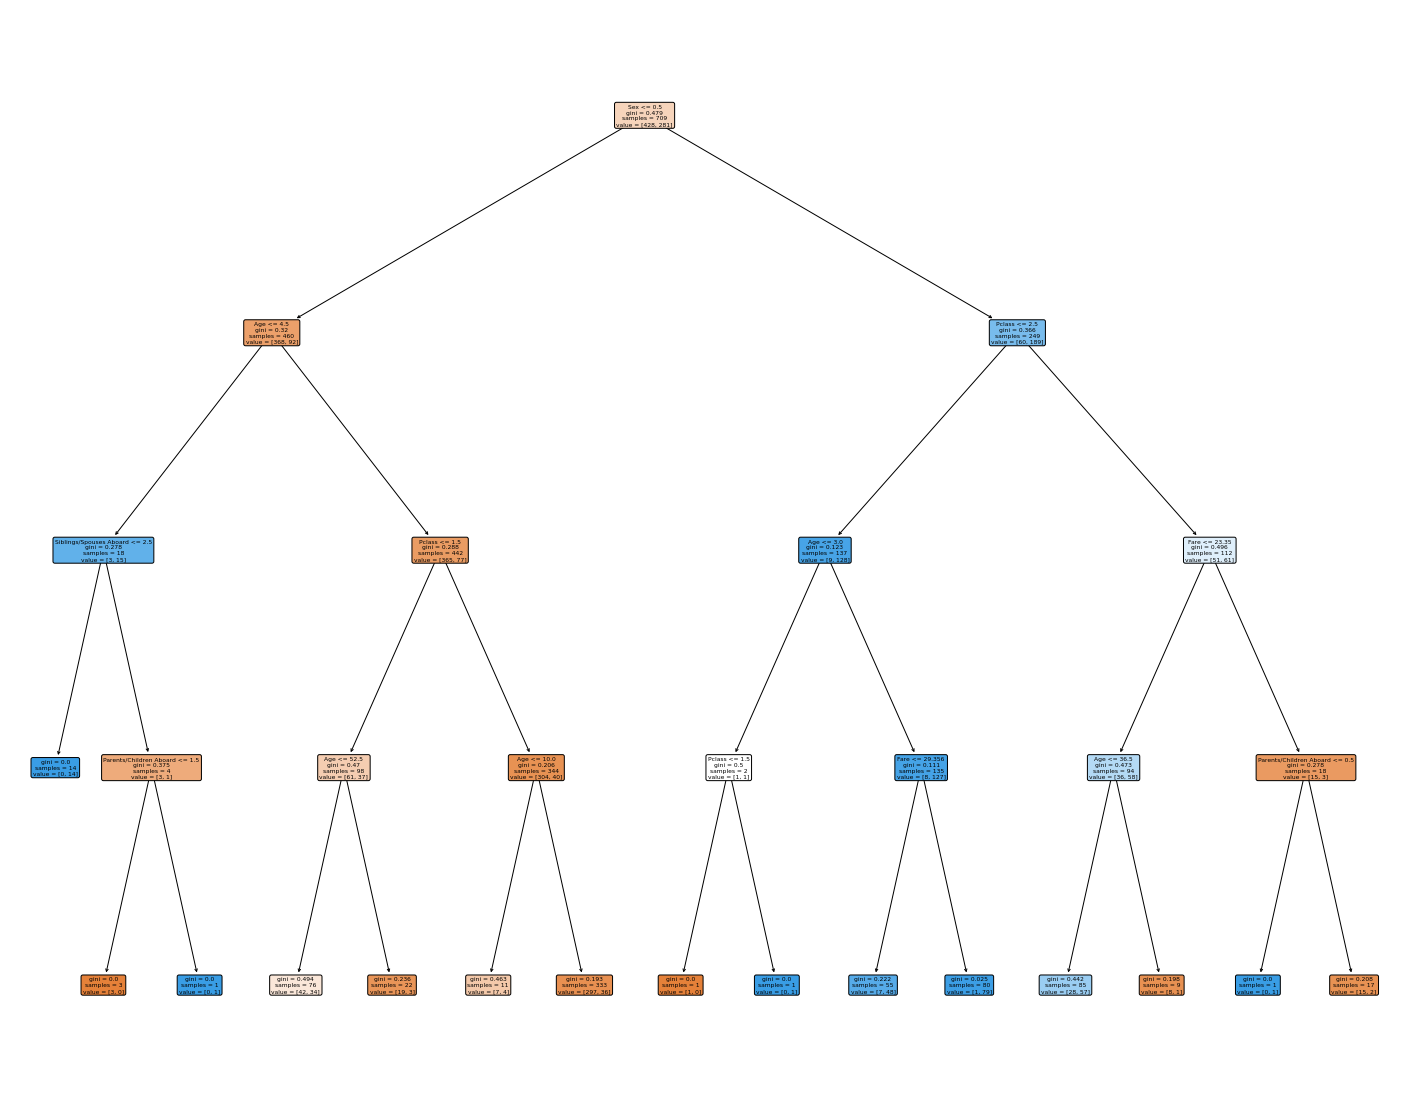

In [84]:
#Decision Tree visualisation
from sklearn import tree
plt.figure(figsize=(25,20))  
_ = tree.plot_tree(dt, feature_names = X_train.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

# Deciding best model using above preliminary analysis

In [85]:
#Decision tree is performing better with current parameters
#Training accuracy
print("dt_training_accuracy=",dt.score(X_train,Y_train))
#Test Accuracy
print("dt_test_accuracy=",dt.score(X_test,Y_test))
#It can be noticed the model is not suffering from Overfitting

dt_training_accuracy= 0.8363892806770099
dt_test_accuracy= 0.8314606741573034


In [86]:
#Computing predictions
Y_pred=dt.predict(X_test)

In [87]:
#Evaluating confusion matrix
confusion_matrix(Y_test, Y_pred)

array([[103,  14],
       [ 16,  45]])

In [88]:
#Generating classification report
pd.DataFrame(classification_report(Y_test, Y_pred,output_dict=True)).T

,precision,recall,f1-score,support
0,0.865546,0.880342,0.872881,117.000000
1,0.762712,0.737705,0.750000,61.000000
accuracy,0.831461,0.831461,0.831461,0.831461
macro avg,0.814129,0.809023,0.811441,178.000000
weighted avg,0.830305,0.831461,0.830770,178.000000


# Prediction Code

In [89]:
#Extracting probabilities
probabilities=dt.predict_proba(X_test)
Survived_probabilities=probabilities[:,1]

In [90]:
#Creating dataframe with actual classes and survival probabilities
df_prob=pd.DataFrame([Survived_probabilities,Y_test]).T
df_prob.columns=["Survived_probabilities","Actual_Class"]

# Plotting Results

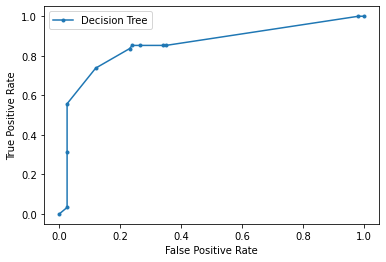

In [91]:
dt_fpr, dt_tpr, dt_thresholds = roc_curve(Y_test, Survived_probabilities)
# plot the roc curve for the model
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [92]:
#AUC values needs to be compared for deciding best model from different models but for now I have used it only for decision tree
dt_auc = roc_auc_score(Y_test, Survived_probabilities)
print(dt_auc)

0.8535799355471486


In [93]:
#To find optimal threshold value for better classification
gmeans = np.sqrt(dt_tpr * (1-dt_fpr))
ix = np.argmax(gmeans)
print('Optimal Threshold=%f, G-Mean=%.3f' % (dt_thresholds[ix], gmeans[ix]))

Optimal Threshold=0.670588, G-Mean=0.806


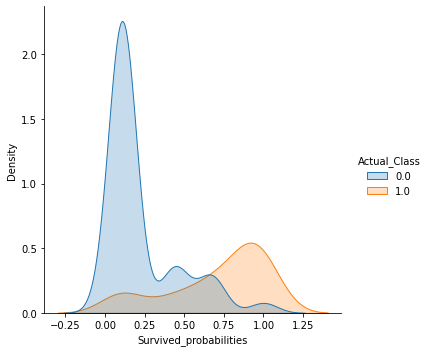

In [94]:
#To distinguish classes based on their probabilities and below plot also give hint that optimal threshold should be in the same range
sns.displot(df_prob, x="Survived_probabilities", hue="Actual_Class", kind="kde", fill=True)

# Quick Inferences

In [ ]:
# It can be noticed from base model, decision tree and random forest giving same results
# I have used decision tree for prediction
# Optimal threshold is 0.67, so this can be used for better classification and this value can also be verified from kde plot
# AUC value is 0.85 for decision tree (Ideally this needs to be compared between all models but I will keep that as next steps)

# Normalizing the dataset

In [64]:
#After normalizing data, we can notice that accuracy for logistic regression, support vector machines and KNN have increased
#For now, I have written the prediction code based on non-normalization dataset but normalized dataset can also be used for better results
#This is only for demonstration purpose
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)   # fit only on train dataset
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=4,random_state=5)
rf=RandomForestClassifier(max_depth=4,n_estimators=10,max_features=4,random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
pac = PassiveAggressiveClassifier(max_iter=100)

lr.fit(X_train,Y_train)
print("lr=",lr.score(X_test,Y_test))

svm.fit(X_train,Y_train)
print("svc=",svm.score(X_test,Y_test))

dt.fit(X_train,Y_train)
print("dt=",dt.score(X_test,Y_test))

rf.fit(X_train,Y_train)
print("rf=",rf.score(X_test,Y_test))

knn.fit(X_train,Y_train)
print("KNN=" , knn.score(X_test,Y_test))

nb.fit(X_train,Y_train)
print ("nb=", nb.score(X_test,Y_test))

pac.fit(X_train,Y_train)
print ("pac=", pac.score(X_test,Y_test))



lr= 0.8146067415730337
svc= 0.8426966292134831
dt= 0.8314606741573034
rf= 0.8314606741573034
KNN= 0.8370786516853933
nb= 0.7752808988764045
pac= 0.3539325842696629


# Next Steps

In [ ]:
#Extensive EDA to check how much target feature "survived" dependent on each independent feature using seaborn library
#We have used quick correlation matrix but better methods can be used. For e.g. correlation between continuos and categorical features etc
#Outliers can be handled
#Splitting ratio between train and test dataset can be tuned
#Cross validation can be implemented
#Compare different models AUC values
#Advance ML models can also be explored such as xgboost & LightGBM etc
#We can also check for feature importance and try different models based on the feature importance
#Hyperparameter tuning can be performed
#We can compare different models using AUC values
#We can look for results with optimal threshold value printed above